In [4]:
import os
import ipdb
from os.path import join

import numpy as np
import cv2

from paths import data_path

from IPython.display import Image

In [6]:
import PIL.Image
from cStringIO import StringIO
import IPython.display
import numpy as np
def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

In [2]:
img = cv2.imread(join(data_path, '2017-01-20 - Lidl.png'), cv2.IMREAD_GRAYSCALE)

In [3]:
kernel  = np.ones((3,3),np.uint8)
kernel[0,2] = kernel[2,2] = kernel[0,0] = kernel[2,0] = 0
img2 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
img2 = cv2.morphologyEx(img2, cv2.MORPH_OPEN, kernel)

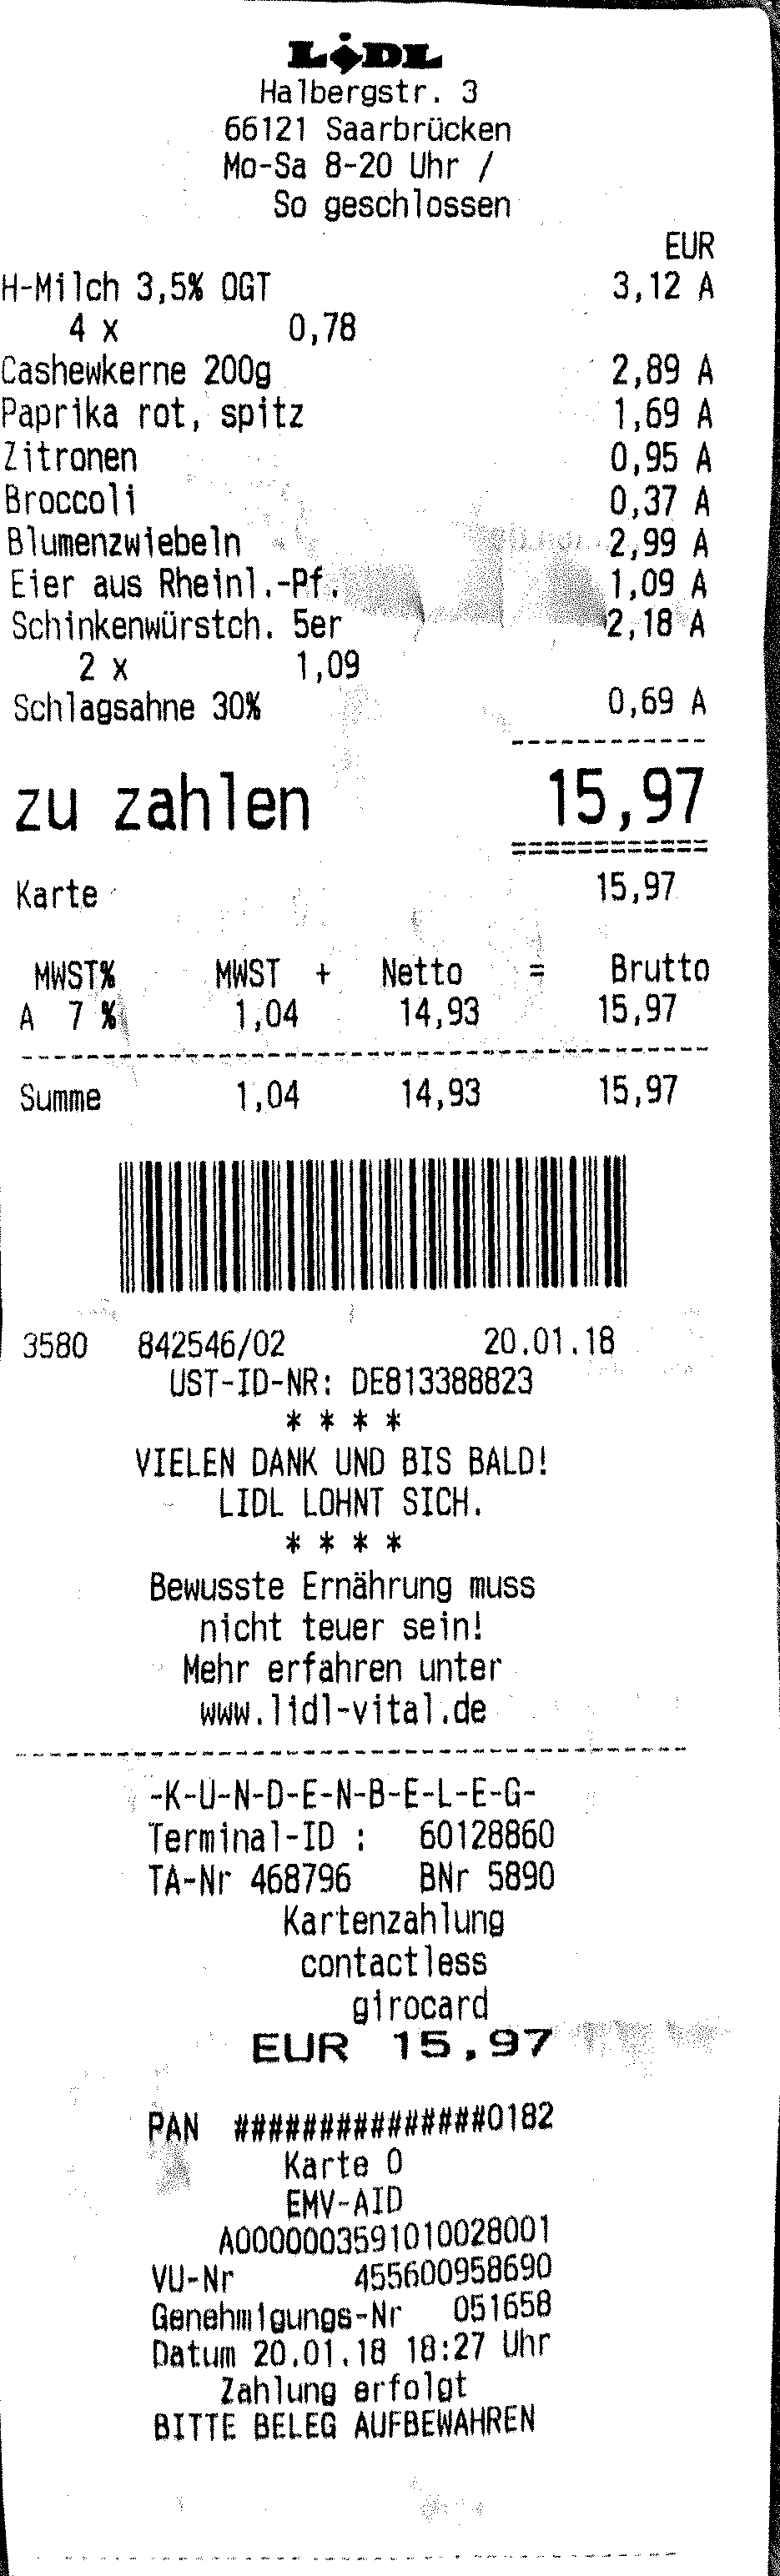

In [7]:
showarray(img)

In [8]:
img.shape

(3089, 935)